In [16]:
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from IPython.display import display
import ipywidgets as widgets

In [4]:
def load_nifti_file(file_path):
    """
    Load a .nii.gz file and convert it to a numpy array.
    """
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

In [5]:
def compute_2d_optical_flow(slice1, slice2):
    """
    Compute optical flow using Farneback's algorithm on two 2D slices.
    :param slice1: First 2D slice (numpy array)
    :param slice2: Second 2D slice (numpy array)
    :return: Optical flow (magnitude and angle) for the slice
    """
    # Convert to float32 for optical flow
    slice1 = slice1.astype(np.float32)
    slice2 = slice2.astype(np.float32)

    # Farneback parameters (can be tuned based on data)
    flow = cv2.calcOpticalFlowFarneback(slice1, slice2, None, 
                                        pyr_scale=0.5, levels=3, winsize=15, 
                                        iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
    return flow





In [6]:
def compute_3d_optical_flow(vol1, vol2):
    """
    Compute approximate 3D optical flow by applying 2D Farneback optical flow
    slice by slice across the volume in the z-direction.
    :param vol1: First 3D volume (numpy array)
    :param vol2: Second 3D volume (numpy array)
    :return: 3D arrays of flow in x and y directions (u, v)
    """
    u_flow = np.zeros_like(vol1)
    v_flow = np.zeros_like(vol1)
    
    # Iterate over each slice in the z-axis
    for i in range(vol1.shape[2]):
        flow = compute_2d_optical_flow(vol1[:, :, i], vol2[:, :, i])
        u_flow[:, :, i] = flow[..., 0]  # x-direction flow
        v_flow[:, :, i] = flow[..., 1]  # y-direction flow
    
    return u_flow, v_flow

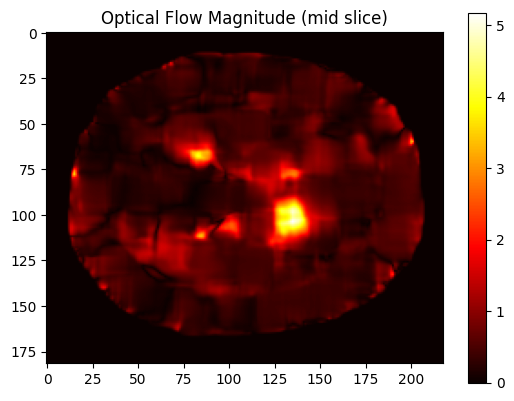

In [7]:




# Load MRI volumes (replace with your actual file paths)
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute optical flow between consecutive volumes
u, v = compute_3d_optical_flow(vol1, vol2)

# Calculate flow magnitude for visualization
flow_magnitude = np.sqrt(u**2 + v**2)

# Visualization of a single slice's flow magnitude
plt.imshow(flow_magnitude[:, :, flow_magnitude.shape[2] // 2], cmap='hot')
plt.colorbar()
plt.title("Optical Flow Magnitude (mid slice)")
plt.show()


In [8]:
# Load MRI volumes (replace with your actual file paths)
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-2073_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-2073_w24_flair_mni_lin_hm.nii.gz")

# Compute optical flow
u, v = compute_3d_optical_flow(vol1, vol2)

# Calculate flow magnitude for each slice
flow_magnitude = np.sqrt(u**2 + v**2)

In [9]:
# Define interactive function to update the slice display
def plot_slice(slice_idx):
    plt.imshow(flow_magnitude[:, :, slice_idx], cmap='hot')
    plt.colorbar()
    plt.title(f"Optical Flow Magnitude (Slice {slice_idx})")
    plt.show()

# Interactive slider
slice_slider = widgets.IntSlider(value=0, min=0, max=flow_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [10]:
# Load MRI volumes (replace with your actual file paths)
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute optical flow
u, v = compute_3d_optical_flow(vol1, vol2)

# Calculate flow magnitude for each slice
flow_magnitude = np.sqrt(u**2 + v**2)




In [ ]:
# Define interactive function to update the slice display
def plot_slice(slice_idx):
    plt.imshow(flow_magnitude[:, :, slice_idx], cmap='hot')
    plt.colorbar()
    plt.title(f"Optical Flow Magnitude (Slice {slice_idx})")
    plt.show()

# Interactive slider
slice_slider = widgets.IntSlider(value=0, min=0, max=flow_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

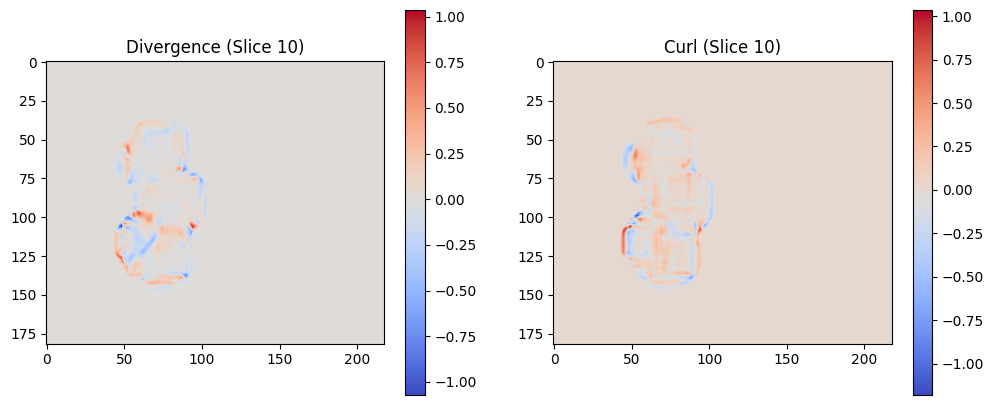

In [9]:
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_nifti_file(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

def compute_2d_optical_flow(slice1, slice2):
    slice1 = slice1.astype(np.float32)
    slice2 = slice2.astype(np.float32)
    flow = cv2.calcOpticalFlowFarneback(slice1, slice2, None, 
                                        pyr_scale=0.5, levels=3, winsize=15, 
                                        iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
    return flow[..., 0], flow[..., 1]  # Return u and v components

def compute_divergence_and_curl(u, v):
    # Compute gradients
    du_dx, du_dy = np.gradient(u)
    dv_dx, dv_dy = np.gradient(v)
    
    # Divergence
    divergence = du_dx + dv_dy
    
    # Curl (in 2D, only one component in z-direction)
    curl = dv_dx - du_dy
    
    return divergence, curl

# Load MRI volumes
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Initialize arrays to store divergence and curl for each slice
divergences = []
curls = []

# Process each slice and compute optical flow, divergence, and curl
for i in range(vol1.shape[2] - 1):
    u, v = compute_2d_optical_flow(vol1[:, :, i], vol2[:, :, i])
    divergence, curl = compute_divergence_and_curl(u, v)
    divergences.append(divergence)
    curls.append(curl)

# Convert lists to 3D numpy arrays for easier visualization
divergences = np.array(divergences)
curls = np.array(curls)

# Visualize one slice of divergence and curl
slice_idx = 10  # Choose an index to visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(divergences[slice_idx], cmap='coolwarm')
plt.colorbar()
plt.title(f"Divergence (Slice {slice_idx})")

plt.subplot(1, 2, 2)
plt.imshow(curls[slice_idx], cmap='coolwarm')
plt.colorbar()
plt.title(f"Curl (Slice {slice_idx})")

plt.show()


In [17]:
# Define interactive function to update the slice display
def plot_slice(slice_idx):
    plt.imshow(flow_magnitude[:, :, slice_idx], cmap='coolwarm')
    plt.colorbar()
    plt.title(f"Optical Flow Magnitude (Slice {slice_idx})")
    plt.show()

In [ ]:


# Interactive slider
slice_slider = widgets.IntSlider(value=0, min=0, max=divergences.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=217), Output()), _dom_classes=('widget-inter…

In [13]:
# Interactive slider
slice_slider = widgets.IntSlider(value=0, min=0, max=curls.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=217), Output()), _dom_classes=('widget-inter…

In [11]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def load_nifti_file(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

def compute_3d_optical_flow(vol1, vol2, alpha=0.001, n_iter=100):
    """
    Compute 3D optical flow between two 3D volumes using the Horn-Schunck method.
    
    Args:
        vol1 (np.ndarray): The first 3D volume (e.g., MRI timepoint 1).
        vol2 (np.ndarray): The second 3D volume (e.g., MRI timepoint 2).
        alpha (float): Smoothness term parameter.
        n_iter (int): Number of iterations.
        
    Returns:
        u, v, w (np.ndarray): The 3D flow vectors in x, y, and z directions.
    """
    # Initialize flow vectors with zeros
    u = np.zeros_like(vol1)
    v = np.zeros_like(vol1)
    w = np.zeros_like(vol1)

    # Calculate derivatives
    Ix = (np.gradient(vol1, axis=0) + np.gradient(vol2, axis=0)) / 2
    Iy = (np.gradient(vol1, axis=1) + np.gradient(vol2, axis=1)) / 2
    Iz = (np.gradient(vol1, axis=2) + np.gradient(vol2, axis=2)) / 2
    It = vol2 - vol1

    # Iteratively compute the flow vectors
    for _ in range(n_iter):
        # Compute local averages of the flow vectors
        u_avg = gaussian_filter(u, sigma=1)
        v_avg = gaussian_filter(v, sigma=1)
        w_avg = gaussian_filter(w, sigma=1)

        # Update flow estimates
        denominator = alpha**2 + Ix**2 + Iy**2 + Iz**2
        u = u_avg - (Ix * (Ix * u_avg + Iy * v_avg + Iz * w_avg + It)) / denominator
        v = v_avg - (Iy * (Ix * u_avg + Iy * v_avg + Iz * w_avg + It)) / denominator
        w = w_avg - (Iz * (Ix * u_avg + Iy * v_avg + Iz * w_avg + It)) / denominator

    return u, v, w

# Load MRI volumes
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute 3D optical flow
u, v, w = compute_3d_optical_flow(vol1, vol2)

# Visualize the flow magnitude in a specific slice
flow_magnitude = np.sqrt(u**2 + v**2 + w**2)
# slice_idx = 10  # Choose an index to visualize
# plt.imshow(flow_magnitude[:, :, slice_idx], cmap='hot')
# plt.colorbar()
# plt.title(f"3D Optical Flow Magnitude (Slice {slice_idx})")
# plt.show()
slice_slider = widgets.IntSlider(value=0, min=0, max=flow_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)


interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from opticalflow3d import OpticalFlow3D

def load_nifti_file(file_path):
    """Load NIfTI file and return the 3D data array."""
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

def compute_3d_optical_flow(vol1, vol2):
    """
    Compute the 3D optical flow between two 3D volumes using opticalflow3d.
    
    Args:
        vol1 (np.ndarray): The first 3D volume (e.g., MRI timepoint 1).
        vol2 (np.ndarray): The second 3D volume (e.g., MRI timepoint 2).
        
    Returns:
        u, v, w (np.ndarray): The 3D flow vectors in x, y, and z directions.
    """
    # Initialize the OpticalFlow3D object
    optical_flow = OpticalFlow3D(alpha=0.001, iterations=100, pyramid_levels=3)
    
    # Compute the optical flow (returns a 4D array where the last dimension has the u, v, w components)
    flow = optical_flow.calculate(vol1, vol2)
    u, v, w = flow[..., 0], flow[..., 1], flow[..., 2]
    return u, v, w

# Load MRI volumes
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute 3D optical flow
u, v, w = compute_3d_optical_flow(vol1, vol2)

# Visualize the flow magnitude in a specific slice
flow_magnitude = np.sqrt(u**2 + v**2 + w**2)
slice_slider = widgets.IntSlider(value=0, min=0, max=flow_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)


ModuleNotFoundError: No module named 'opticalflow3d'

In [12]:
import torch

In [3]:
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

In [4]:
vol2.shape

(182, 218, 182)

In [10]:
vol2_tensor = torch.from_numpy(vol2).float().unsqueeze(1)

In [11]:
vol2_tensor.shape

torch.Size([182, 1, 218, 182])

In [14]:
import numpy as np
import nibabel as nib
import torch
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle  # Regularization using Total Variation

def load_nifti_file(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

def compute_tv_l1_optical_flow(vol1, vol2, num_iterations=10, lambda_tv=0.15):
    """
    Compute TV-L1 optical flow between two 3D MRI volumes.
    This implementation uses an iterative approach and total variation regularization.
    """
    # Ensure that vol1 and vol2 are of shape (D, H, W)
    vol1, vol2 = vol1.astype(np.float32), vol2.astype(np.float32)
    u = np.zeros_like(vol1)  # Flow in the x direction
    v = np.zeros_like(vol1)  # Flow in the y direction
    w = np.zeros_like(vol1)  # Flow in the z direction

    # Parameters for the TV-L1 model
    tau = 0.25
    epsilon = 0.01

    for i in range(num_iterations):
        # Compute gradients
        grad_x = np.gradient(vol1, axis=0)
        grad_y = np.gradient(vol1, axis=1)
        grad_z = np.gradient(vol1, axis=2)
        
        # Estimate the flow based on intensity difference and total variation regularization
        intensity_diff = vol2 - vol1
        
        # Update flows
        u = u + tau * (grad_x * intensity_diff - lambda_tv * denoise_tv_chambolle(u, weight=epsilon))
        v = v + tau * (grad_y * intensity_diff - lambda_tv * denoise_tv_chambolle(v, weight=epsilon))
        w = w + tau * (grad_z * intensity_diff - lambda_tv * denoise_tv_chambolle(w, weight=epsilon))

    return u, v, w

# Load MRI volumes
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute TV-L1 3D optical flow
u, v, w = compute_tv_l1_optical_flow(vol1, vol2)

# Visualize flow magnitude
flow_magnitude = np.sqrt(u**2 + v**2 + w**2)
# slice_idx = 10  # Choose an index to visualize
# plt.imshow(flow_magnitude[:, :, slice_idx], cmap='hot')
# plt.colorbar()
# plt.title(f"TV-L1 Optical Flow Magnitude (Slice {slice_idx})")
# plt.show()


In [ ]:
slice_slider = widgets.IntSlider(value=0, min=0, max=flow_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [62]:
import numpy as np

def compute_divergence(u, v, w):
    """
    Computes the divergence of a 3D vector field.
    Parameters:
        u, v, w: 3D numpy arrays representing the flow components along x, y, and z axes.
    Returns:
        div: 3D numpy array of the divergence field.
    """
    # Calculate partial derivatives
    du_dx = np.gradient(u, axis=0)
    dv_dy = np.gradient(v, axis=1)
    dw_dz = np.gradient(w, axis=2)
    
    # Divergence is the sum of partial derivatives
    div = du_dx + dv_dy + dw_dz
    return div

def compute_curl(u, v, w):
    """
    Computes the curl of a 3D vector field.
    Parameters:
        u, v, w: 3D numpy arrays representing the flow components along x, y, and z axes.
    Returns:
        curl_x, curl_y, curl_z: 3D numpy arrays representing the components of the curl vector field.
    """
    # Calculate partial derivatives
    dw_dy = np.gradient(w, axis=1)
    dv_dz = np.gradient(v, axis=2)
    du_dz = np.gradient(u, axis=2)
    dw_dx = np.gradient(w, axis=0)
    dv_dx = np.gradient(v, axis=0)
    du_dy = np.gradient(u, axis=1)
    
    # Curl components
    curl_x = dw_dy - dv_dz
    curl_y = du_dz - dw_dx
    curl_z = dv_dx - du_dy
    return curl_x, curl_y, curl_z

# Assume u, v, w are the computed optical flow components (from the previous code)
# u, v, w = compute_tv_l1_optical_flow(vol1, vol2)

# Calculate divergence and curl
divergence = compute_divergence(u, v, w)
curl_x, curl_y, curl_z = compute_curl(u, v, w)

# Visualize divergence and curl magnitude on a specific slice
# slice_idx = 10  # Choose a slice for visualization
curl_magnitude = np.sqrt(curl_x**2 + curl_y**2 + curl_z**2)

# Plot divergence
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(divergence[:, :, slice_idx], cmap='coolwarm')
# plt.colorbar()
# plt.title(f"Divergence (Slice {slice_idx})")

# # Plot curl magnitude
# plt.subplot(1, 2, 2)
# plt.imshow(curl_magnitude[:, :, slice_idx], cmap='coolwarm')
# plt.colorbar()
# plt.title(f"Curl Magnitude (Slice {slice_idx})")
# plt.show()


In [24]:
# Define interactive function to update the slice display
def plot_slice_no_map(slice_idx):
    plt.imshow(flow_magnitude[:, :, slice_idx])
    plt.colorbar()
    plt.title(f"Optical Flow Magnitude (Slice {slice_idx})")
    plt.show()

In [25]:
slice_slider = widgets.IntSlider(value=0, min=0, max=vol2.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice_no_map, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [26]:
slice_slider = widgets.IntSlider(value=0, min=0, max=vol1.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice_no_map, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [63]:
slice_slider = widgets.IntSlider(value=0, min=0, max=divergence.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [ ]:
slice_slider = widgets.IntSlider(value=0, min=0, max=curl_magnitude.shape[2] - 1, step=1, description="Slice")
widgets.interactive(plot_slice, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

In [41]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Sample functions for loading data and computing optical flow components.
def load_nifti_file(file_path):
    nii_img = nib.load(file_path)
    data = nii_img.get_fdata()
    return data

def compute_tv_l1_optical_flow(vol1, vol2, num_iterations=10, lambda_tv=0.15):
    """
    Compute TV-L1 optical flow between two 3D MRI volumes.
    This implementation uses an iterative approach and total variation regularization.
    """
    # Ensure that vol1 and vol2 are of shape (D, H, W)
    vol1, vol2 = vol1.astype(np.float32), vol2.astype(np.float32)
    u = np.zeros_like(vol1)  # Flow in the x direction
    v = np.zeros_like(vol1)  # Flow in the y direction
    w = np.zeros_like(vol1)  # Flow in the z direction

    # Parameters for the TV-L1 model
    tau = 0.25
    epsilon = 0.01

    for i in range(num_iterations):
        # Compute gradients
        grad_x = np.gradient(vol1, axis=0)
        grad_y = np.gradient(vol1, axis=1)
        grad_z = np.gradient(vol1, axis=2)
        
        # Estimate the flow based on intensity difference and total variation regularization
        intensity_diff = vol2 - vol1
        
        # Update flows
        u = u + tau * (grad_x * intensity_diff - lambda_tv * denoise_tv_chambolle(u, weight=epsilon))
        v = v + tau * (grad_y * intensity_diff - lambda_tv * denoise_tv_chambolle(v, weight=epsilon))
        w = w + tau * (grad_z * intensity_diff - lambda_tv * denoise_tv_chambolle(w, weight=epsilon))

    return u, v, w

# Load MRI volumes
vol1 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_baseline_flair_mni_lin_hm.nii.gz")
vol2 = load_nifti_file("E:/NMSS Project/ASCEND/agg_flair_lin_hm/AA-3974_w24_flair_mni_lin_hm.nii.gz")

# Compute TV-L1 3D optical flow (placeholder function for illustration)
u, v, w = compute_tv_l1_optical_flow(vol1, vol2)




interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

<function __main__.plot_optical_flow(slice_idx)>

In [ ]:
# Define the plotting function for a specific slice
def plot_optical_flow(slice_idx):
    """
    Plot the optical flow as quiver plot for a specific slice (along the z-axis).
    """
    # Extract the flow components for the specified slice
    u_slice = u[:, :, slice_idx]
    v_slice = v[:, :, slice_idx]
    
    # Set up the mesh grid for quiver plot
    H, W = u_slice.shape
    X, Y = np.meshgrid(np.arange(W), np.arange(H))
    
    # Plot the quiver (arrow) plot for optical flow
    plt.figure(figsize=(8, 8))
    plt.imshow(vol1[:, :, slice_idx], cmap='gray', origin='lower')
    plt.quiver(X[::20,::20], Y[::20,::20], u_slice[::20,::20], v_slice[::20,::20],color='blue', scale=250, width=0.0025)
    plt.title(f"Optical Flow (Slice {slice_idx})")
    plt.axis("off")
    plt.show()

# Set up the interactive slider
slice_slider = IntSlider(min=0, max=vol1.shape[2] - 1, step=1, value=0, description='Slice')

# Use the interact function to make it interactive in Jupyter
interact(plot_optical_flow, slice_idx=slice_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=181), Output()), _dom_classes=('widget-inter…

<function __main__.plot_optical_flow(slice_idx)>